In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm, FuncNorm, Normalize as LinearNorm
import matplotlib.pyplot as plt

In [2]:
f = open("bench_out.txt", 'r')
l = f.read()
useful = []
for a in l.split("\n"):
    if "Benchmarking" in a or ("open" not in a and "verify" not in a):
        continue
    r = a.split("/")
    if len(r) < 3:
        continue
    r.extend(r[2].split())
    del r[2]
    useful.append(r)

In [3]:
df = pd.DataFrame(data=useful)
df["method"] = df[1].str.split("_", expand=True)[0]
df["n_pts"] = df[1].str.split("_", expand=True)[1].astype(int)
df["n_poly"] = df[2].astype(int)
df["op"] = df[0]
df["time"] = df[6].astype(float)
df.loc[df[7] == "s", "time"] *= 1000 # adjust for seconds units
dfm1open = df[(df["method"] == "m1") & (df["op"] == "open")].pivot(index="n_pts", columns="n_poly", values="time")
dfm1veri = df[(df["method"] == "m1") & (df["op"] == "verify")].pivot(index="n_pts", columns="n_poly", values="time")
dfm2open = df[(df["method"] == "m2") & (df["op"] == "open")].pivot(index="n_pts", columns="n_poly", values="time")
dfm2veri = df[(df["method"] == "m2") & (df["op"] == "verify")].pivot(index="n_pts", columns="n_poly", values="time")

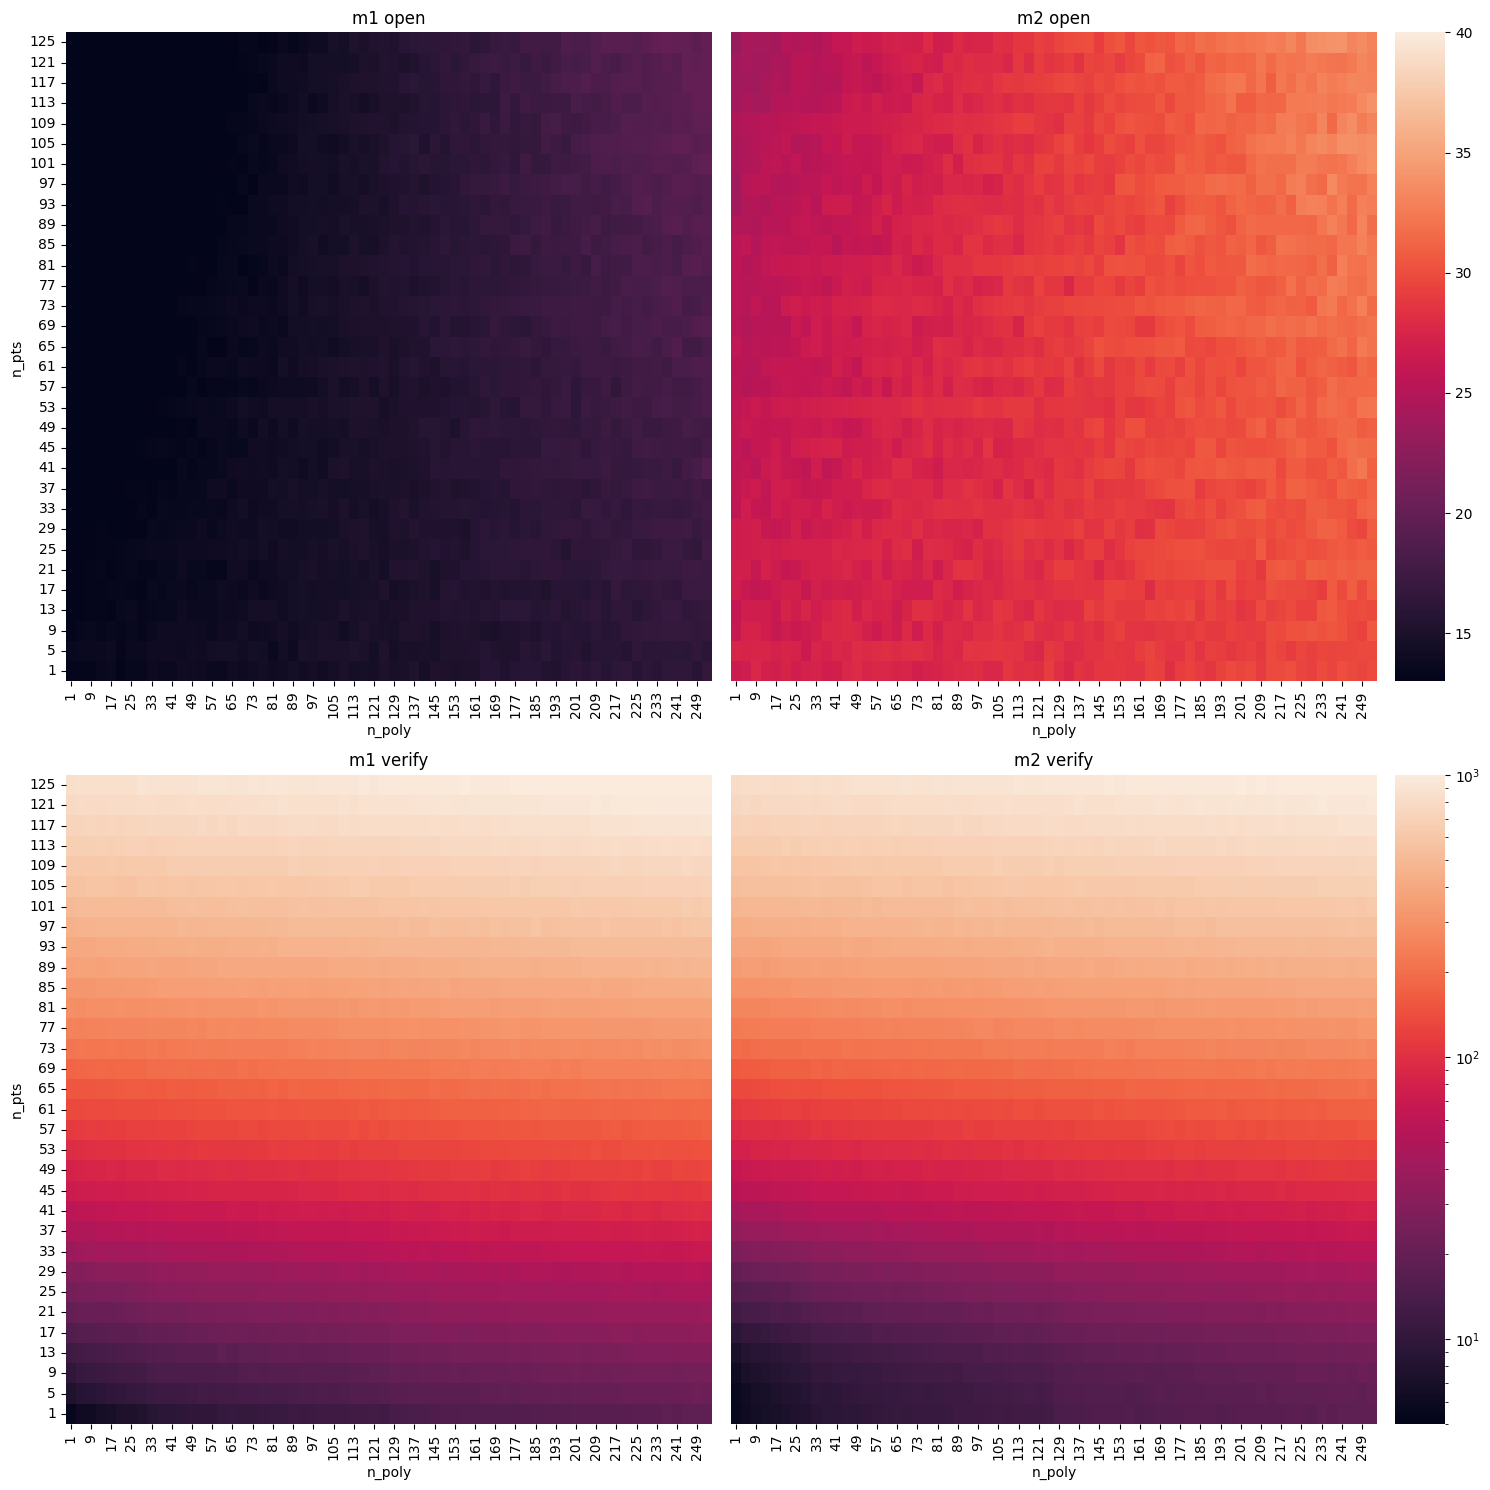

In [5]:
def plot_heatmap(df, title, limit=None, **kwds):
    cols = df.columns[df.columns < limit] if limit else df.columns
    ind = df.index[df.index < limit] if limit else df.index
    df = df.reindex(sorted(cols), axis=1)
    df = df.reindex(sorted(ind, reverse=True), axis=0)
    ax = sns.heatmap(data=df, **kwds)
    ax.set_title(title)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 15), width_ratios=[13, 13, 1])
plot_heatmap(dfm1open, "m1 open", norm=LinearNorm(13, 40), ax=ax1, cbar=False)
plot_heatmap(dfm2open, "m2 open", norm=LinearNorm(13, 40), ax=ax2, cbar_ax=ax3, yticklabels=False)
ax2.set_ylabel(None)
plot_heatmap(dfm1veri, "m1 verify", norm=LogNorm(5, 1000, clip=True), ax=ax4, cbar=False)
plot_heatmap(dfm2veri, "m2 verify", norm=LogNorm(5, 1000, clip=True), ax=ax5, cbar_ax=ax6, yticklabels=False)
ax5.set_ylabel(None)
plt.tight_layout()

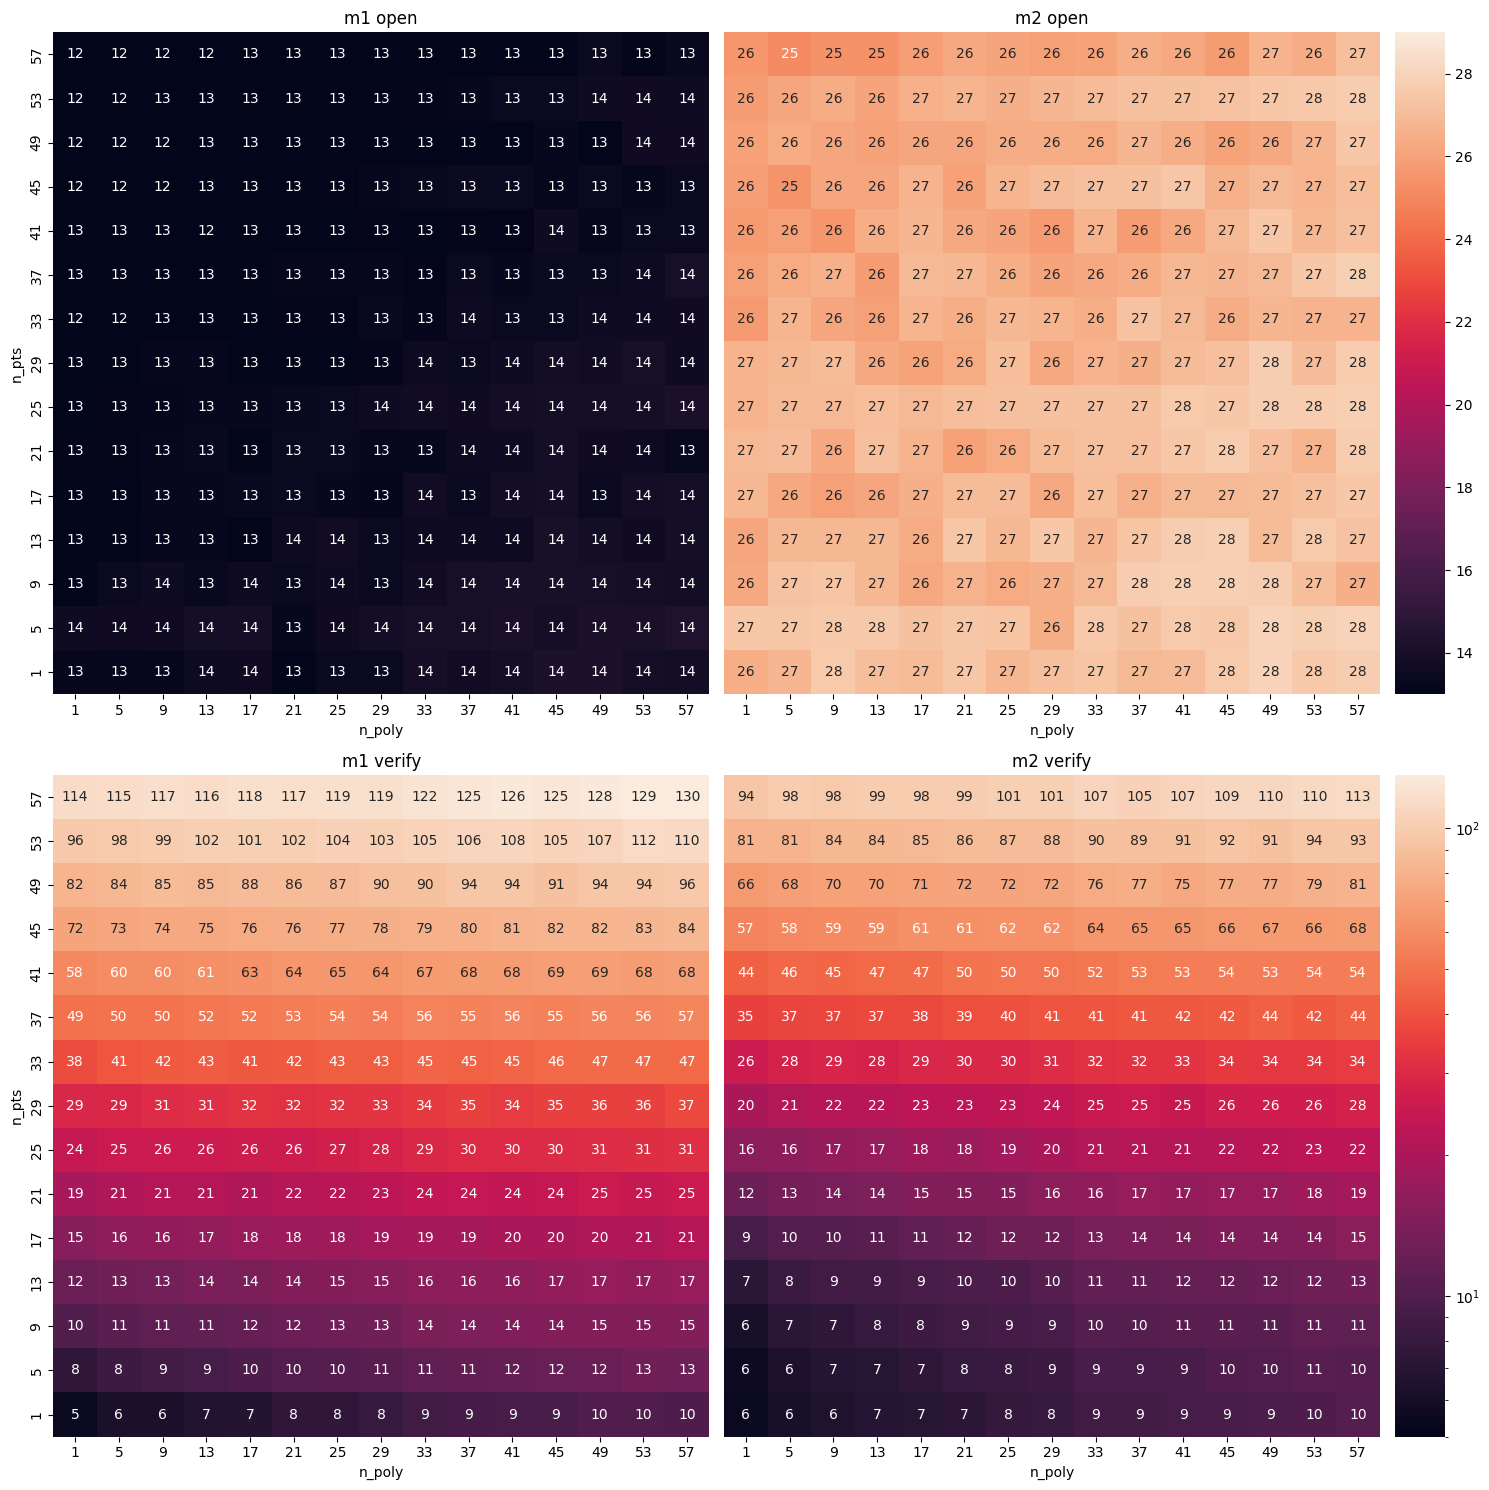

In [108]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 15), width_ratios=[13, 13, 1])
plot_heatmap(dfm1open, "m1 open", limit=60, annot=True, fmt=".0f", norm=LinearNorm(13, 29), ax=ax1, cbar=False)
plot_heatmap(dfm2open, "m2 open", limit=60, annot=True, fmt=".0f", norm=LinearNorm(13, 29), ax=ax2, cbar_ax=ax3, yticklabels=False)
ax2.set_ylabel(None)
plot_heatmap(dfm1veri, "m1 verify", limit=60, annot=True, fmt=".0f", norm=LogNorm(5, 130, clip=True), ax=ax4, cbar=False)
plot_heatmap(dfm2veri, "m2 verify", limit=60, annot=True, fmt=".0f", norm=LogNorm(5, 130, clip=True), ax=ax5, cbar_ax=ax6, yticklabels=False)
ax5.set_ylabel(None)
plt.tight_layout()

In [80]:
dfm1veri

n_poly,1,5,9,13,17,21,25,29,33,37,...,217,221,225,229,233,237,241,245,249,253
n_pts,,,,,,,,,,,,,,,,,,,,,
1,5.4034,6.2145,6.2262,6.7845,6.8575,7.5137,7.5143,7.9237,8.7021,9.0403,...,17.212,17.134,17.372,17.624,17.547,18.245,18.006,18.526,18.053,18.459
5,7.5700,8.3920,8.8683,9.1903,9.7898,10.0890,10.4130,10.5600,11.2840,11.4760,...,20.228,20.606,20.939,20.764,20.604,21.035,21.066,21.039,21.776,21.658
9,9.8289,10.8080,11.1690,11.3550,11.8570,12.2480,12.6130,12.9070,13.9040,14.1080,...,23.178,22.827,24.053,24.203,24.219,23.911,23.572,23.934,23.990,24.476
13,12.1080,12.9010,13.0570,13.6780,13.8960,14.4950,14.8380,15.0840,15.6880,15.9510,...,26.444,26.845,27.506,27.556,27.948,27.381,28.040,27.823,27.928,28.253
17,15.0710,16.2380,16.3460,16.6170,17.5600,17.7290,17.9670,18.6850,19.1480,19.1530,...,31.245,31.703,30.629,31.936,31.696,32.390,32.559,32.509,33.890,32.990
21,19.3260,20.5570,21.1210,21.2520,20.6820,21.6350,22.2970,23.0090,23.6470,24.1130,...,36.604,37.495,37.432,36.602,37.856,37.633,37.762,38.613,38.309,39.149
25,24.4750,25.3210,25.5790,25.6750,25.9610,26.0000,26.9910,28.0240,29.3620,29.7590,...,44.748,45.080,44.271,44.144,43.886,44.994,45.116,45.916,45.932,46.014
29,29.1530,29.3930,30.5460,31.4660,32.0940,31.8830,32.4270,32.7120,33.7380,35.3510,...,51.128,50.472,52.367,53.592,53.867,52.402,52.986,54.465,55.267,53.741
33,38.4470,40.8310,41.9590,42.5280,41.3550,42.3070,43.1390,43.1320,44.6440,44.6130,...,64.211,64.091,64.868,67.432,67.759,65.551,66.136,66.470,68.527,69.243


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [118]:
m1open = dfp[(dfp["method"] == "m1") & (dfp["op"] == "open")]
m1open

KeyError: 'method'

In [81]:
sns.heatmap(data=m1open, x="n_pts", y="n_poly")

NameError: name 'm1open' is not defined